In [3]:
%reload_ext autoreload
%autoreload 2

from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

from loader import transform
from models import FCN8s_voc, Config

In [4]:
config = Config()
state_path = 'ckpt/fcn8s.pth'

model = torch.nn.DataParallel(FCN8s_voc(config))
# model.load_state_dict(torch.load(state_path, map_location=torch.device('cpu')))

In [5]:
sample_root = 'sample/'
samples = [sample_root + str(i) + '.jpg' for i in range(3)]
samples_label = [sample_root + str(i) + '_label.png' for i in range(3)]

In [6]:
imgs = [Image.open(img) for img in samples]
labels = [Image.open(img) for img in samples_label]

data = [transform(config)(img) for img in imgs]
data = torch.stack(data)

In [7]:
with torch.no_grad():
    model.eval()
    logit = model(data)

inferred = transforms.Resize(imgs[0].size[::-1])(torch.argmax(logit, dim=1))

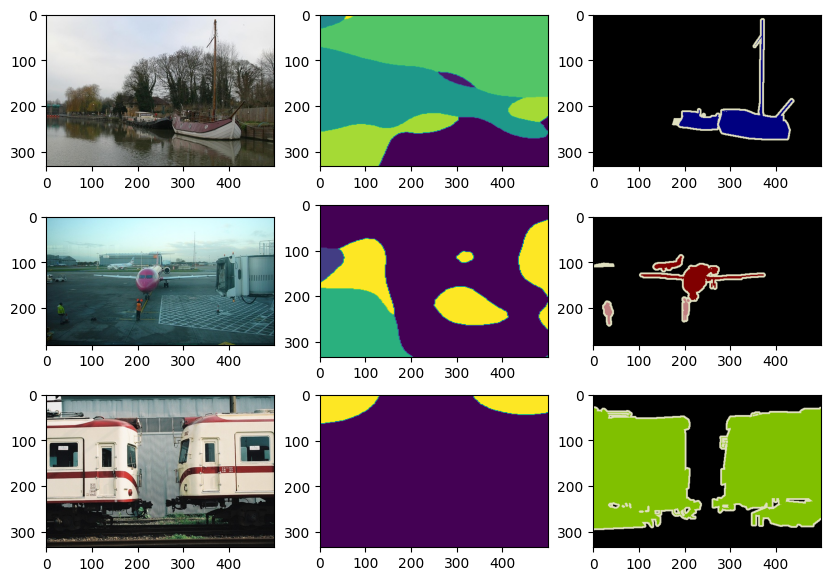

In [8]:
plt.figure(figsize=(10, 7))
plt.axis('off')

for i in range(len(imgs)):
    plt.subplot(3, 3, 3*i+1)
    plt.imshow(imgs[i])
    plt.subplot(3, 3, 3*i+2)
    plt.imshow(inferred[i])
    plt.subplot(3, 3, 3*i+3)
    plt.imshow(labels[i])

plt.axis("image")
plt.show()